In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import yroots as yr
import yr.Optimal_QR as O_QR

In [2]:
data = np.load('chebsuite_result.pkl',allow_pickle=True)
qrt = pd.DataFrame(data['qrt'])
svd = pd.DataFrame(data['svd'])
tvb = pd.DataFrame(data['tvb'])

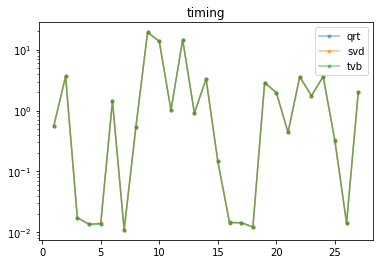

In [19]:
plt.semilogy(qrt['timing'],marker='.',c='C0',label='qrt',alpha=.5)
plt.semilogy(svd['timing'],marker='.',c='C1',label='svd',alpha=.5)
plt.semilogy(tvb['timing'],marker='.',c='C2',label='tvb',alpha=.5)
plt.title('timing')
plt.legend()

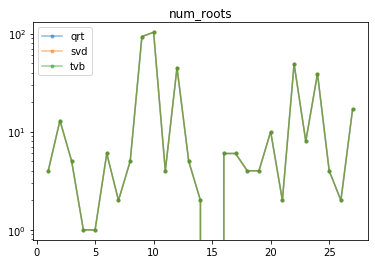

In [13]:
plt.semilogy(qrt['num_roots'],marker='.',c='C0',label='qrt',alpha=.5)
plt.semilogy(svd['num_roots'],marker='.',c='C1',label='svd',alpha=.5)
plt.semilogy(tvb['num_roots'],marker='.',c='C2',label='tvb',alpha=.5)
plt.title('num_roots')
plt.legend()

In [5]:
qrt

,residuals,timing,norms,num_roots,cond,backcond,cond_eig,gradient_info
1,4.852704e-10,0.568031,2.087248e-10,4,960.933244,960.933244,"[1.3714199839991816, 1.3714199839991816, 1.351...","[[[(0.7443798277917909+0j), (0.759717969234236..."
2,5.890848e-11,3.651177,9.526811e-07,13,31435.675621,31435.675621,"[1.4897991943263986, 1.4897991943263986, 1.345...","[[[(-0.0006819280488296534+0j), (-0.0006739653..."
3,6.406117e-15,0.017410,1.135640e-13,5,2.000000,2.000000,"[1.8033394178543258, 1.8033394178543258, 19.36...","[[[(-1.6947283659654067+0j), (1.30320917416280..."
4,0.000000e+00,0.013629,0.000000e+00,1,0.000000,0.000000,"[[1.0000000000000004], [1.0000000000000004]]","[[[(1+0j), (-1+0j)], [(1+0j), (1+0j)]]]"
5,8.326673e-17,0.013814,4.996004e-16,1,0.000000,0.000000,"[[2.0810003364413405], [2.0810003364413405]]","[[[(0.5+0j), (1+0j)], [(-2.0999999999999996+0j..."
6,4.855031e-11,1.429971,5.079671e-12,6,441.243083,441.243083,"[1.399116048401338, 1.399116048401338, 1.30624...","[[[(0.00496418523291855+0j), (-0.0029943295491..."
7,4.440892e-16,0.011037,1.660863e-14,2,3.236068,3.236068,"[6.02902579898943, 6.02902579898943, 6.0290257...","[[[(1+0j), 0j], [(-1.9997999999999998+0j), (0...."
8,6.202854e-11,0.528589,2.052551e-11,5,98135.718555,98135.718555,"[1.391390616943393, 1.391390616943393, 1.39031...","[[[(-0.030308661850040178+0j), (-0.00303086616..."
9,5.075028e-09,19.325263,5.195747e-10,93,98940.796315,98940.796315,"[1.4039003918030977, 1.4039003918030977, 1.415...","[[[(-0.0007744952070504123+0j), (-0.0009911346..."
10,3.136612e-08,13.763896,3.879564e-09,103,99971.893036,99971.893036,"[1.3710259690335829, 1.3710259690335829, 1.389...","[[[(0.04282895514228687+0j), (0.00723295533264..."


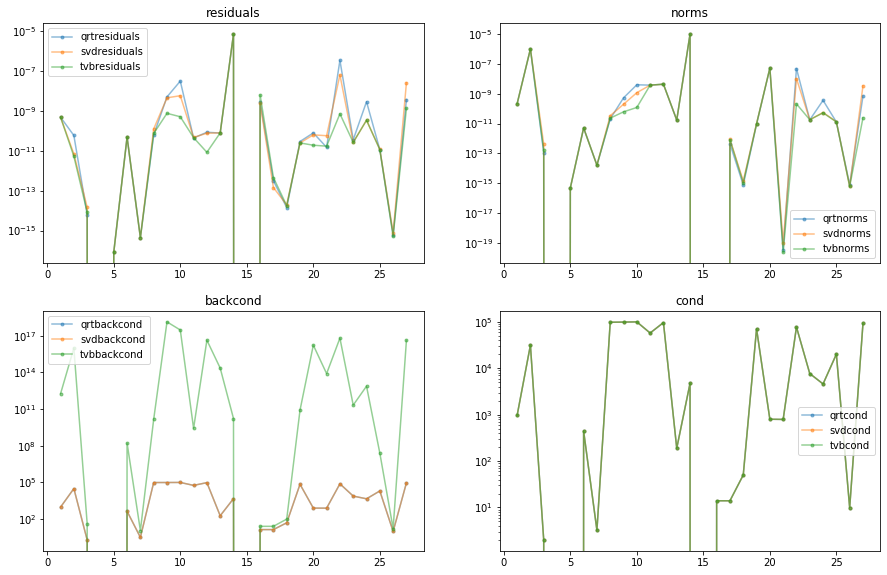

In [6]:
plt.figure(figsize=(15,15))
for i,attr in zip(range(6),['residuals','norms','backcond','cond']):
    plt.subplot(3,2,i+1)
    plt.semilogy(qrt[attr],marker='.',c='C0',label='qrt'+attr,alpha=.5)
    plt.semilogy(svd[attr],marker='.',c='C1',label='svd'+attr,alpha=.5)
    plt.semilogy(tvb[attr],marker='.',c='C2',label='tvb'+attr,alpha=.5)
    plt.title(attr)
    plt.legend()

In [18]:
np.argmax(qrt['residuals'])

13

In [7]:
qrt['cond_eig']

1     [1.3714199839991816, 1.3714199839991816, 1.351...
2     [1.4897991943263986, 1.4897991943263986, 1.345...
3     [1.8033394178543258, 1.8033394178543258, 19.36...
4          [[1.0000000000000004], [1.0000000000000004]]
5          [[2.0810003364413405], [2.0810003364413405]]
6     [1.399116048401338, 1.399116048401338, 1.30624...
7     [6.02902579898943, 6.02902579898943, 6.0290257...
8     [1.391390616943393, 1.391390616943393, 1.39031...
9     [1.4039003918030977, 1.4039003918030977, 1.415...
10    [1.3710259690335829, 1.3710259690335829, 1.389...
11    [1.4373654452036948, 1.4373654452036948, 1.342...
12    [1.4834321420623946, 1.4834321420623946, 1.414...
13    [1.4457199368127354, 1.4457199368127354, 1.366...
14    [1.5385700962195574, 1.5385700962195574, 1.497...
15                                                   []
16    [1.1890087419982758, 1.1890087419982758, 1.288...
17    [1.1890570203205775, 1.1890570203205775, 1.288...
18    [1.9422126321463993, 1.9422126321463993, 1